---
title: Applying Machine Learning and Deep Learning Methods
format:
    html:
        embed-resources: true
        toc: true
---


# Overview

We will be using some machine learning (SVMs) and deep learning methods to compare their performance to our statistical models.

The more rudimentary models for classification achieved between 88 and 90% accuracy. We will see if we can improve on this with more advanced methods.

For regression, **insert Raunak here**.

# Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as kr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Load the data
df = pd.read_csv("../data/academic-success.csv", sep=";")

# Print shape
print(df.shape)

# View
df.head()

(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
# Get Target Value Counts
df["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

The data has 37 features, all numeric with the exception of the target variable which has 3 classes: `Graduate`, `Dropout`, and `Enrolled`.

## Normalization

In [3]:
# Import one hot encoder
from keras.utils import to_categorical
# Normalize the data

# Pull out the target variable
y = df["Target"]

# Pull out the features
X = df.drop("Target", axis=1)

# Normalize the data
numeric_features = [
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Previous qualification (grade)",
    "Admission grade",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

# Normalize numeric features
X[numeric_features] = (X[numeric_features] - X[numeric_features].mean()) / X[numeric_features].std()

# One hot encode categorical features
category_features = X.columns.difference(numeric_features)

# Expand the categorical features
X = pd.get_dummies(X, columns=category_features)

# One hot encode categorical features
category_features = X.columns.difference(numeric_features)

# One hot encode
for category in category_features:
    X[category] = to_categorical(X[category])


# Put data back together
df = pd.concat([X, y], axis=1)

df.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Scholarship holder_0,Scholarship holder_1,Tuition fees up to date_0,Tuition fees up to date_1,Target
0,-0.804750,0.022226,-0.430314,-0.300779,-2.528274,-1.985844,-1.521085,-2.196854,-0.199251,-0.28241,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Dropout
1,2.076585,1.071805,-0.562104,-0.300779,-0.109093,-0.550130,0.418003,0.693520,-0.199251,-0.28241,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Graduate
2,-0.804750,-0.150402,-0.562104,-0.300779,-0.109093,-1.985844,-1.521085,-2.196854,-0.199251,-0.28241,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Dropout
3,-0.804750,-0.509468,-0.430314,-0.300779,-0.109093,-0.071559,0.418003,0.575546,-0.199251,-0.28241,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Graduate
4,-2.472892,1.002754,2.864442,-0.300779,-0.109093,0.167727,0.094821,0.349428,-0.199251,-0.28241,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Graduate


In [4]:
# Print data types
print(df.dtypes)

Previous qualification (grade)         float64
Admission grade                        float64
Age at enrollment                      float64
Curricular units 1st sem (credited)    float64
Curricular units 1st sem (enrolled)    float64
                                        ...   
Scholarship holder_0                   float32
Scholarship holder_1                   float32
Tuition fees up to date_0              float32
Tuition fees up to date_1              float32
Target                                  object
Length: 263, dtype: object


In [5]:
# Count na values
print(df.isna().sum())

Previous qualification (grade)         0
Admission grade                        0
Age at enrollment                      0
Curricular units 1st sem (credited)    0
Curricular units 1st sem (enrolled)    0
                                      ..
Scholarship holder_0                   0
Scholarship holder_1                   0
Tuition fees up to date_0              0
Tuition fees up to date_1              0
Target                                 0
Length: 263, dtype: int64


In [7]:
# Drop enrolled rows for classification
df=df[df["Target"]!="Enrolled"]

We drop enrolled rows for classification to focus on predicting students *final* status. This means we do not want to see students who could still dropout.

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop(columns=["Target"])
y = df["Target"]

# Encode the target
le = LabelEncoder()
y = le.fit_transform(y)

# Print encoded value conversion
print(dict(zip(le.classes_, le.transform(le.classes_))))

# Create train and test sets 0.8 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

{'Dropout': 0, 'Graduate': 1}


In [9]:
# Print the shapes
print(X_train.shape, y_train.shape)

(2904, 262) (2904,)


In [10]:
# Get target value counts
pd.Series(y).value_counts()

1    2209
0    1421
Name: count, dtype: int64

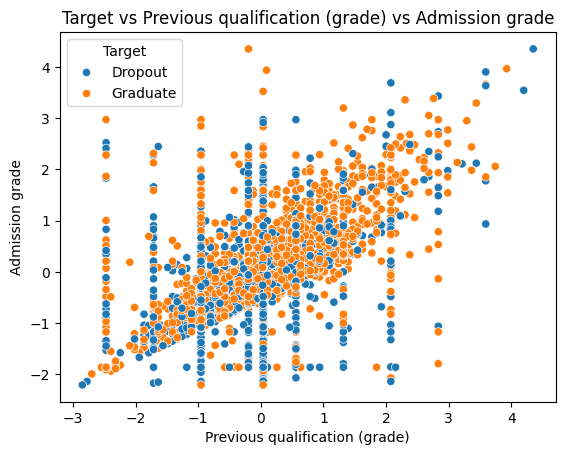

In [11]:
# Plot admission graden vs age
sns.scatterplot(x="Previous qualification (grade)", y="Admission grade", hue="Target", data=df)
plt.title("Target vs Previous qualification (grade) vs Admission grade")
plt.show()

The data is clearly quite messy, with no obvious linear separation of the target. Using highly complex models like deep learning may be necessary to capture the underlying patterns.

# Classification

## Deep Learning

### Build Model

We will be using a simple feedforward neural network with 2 hidden layers.

In [12]:
# Function that builds model given hyperparameters
def build_categorical_model(hidden_layers=1, neurons=30, lr=0.01, regularization="l2", reg_rate=0.001, activation="relu", optimizer="adam", input_shape=(X_train.shape[1],)):
    # Create model
    model = Sequential()

    # Build model based on regularizer
    if regularization == "l1":
        model.add(Dense(neurons, activation=activation, input_shape=input_shape, kernel_regularizer=kr.regularizers.l1(reg_rate)))

        # Add hidden layers
        for _ in range(hidden_layers):
            model.add(Dense(neurons, activation=activation, kernel_regularizer=kr.regularizers.l1(reg_rate)))

    # L2 Regularization
    elif regularization == "l2":
        model.add(Dense(neurons, activation=activation, input_shape=input_shape, kernel_regularizer=kr.regularizers.l2(reg_rate)))
        for _ in range(hidden_layers):
            model.add(Dense(neurons, activation=activation, kernel_regularizer=kr.regularizers.l2(reg_rate)))

    # Dropout
    elif regularization == "dropout":
        model.add(Dense(neurons, activation=activation, input_shape=input_shape))
        model.add(kr.layers.Dropout(reg_rate))
        for _ in range(hidden_layers):
            model.add(Dense(neurons, activation=activation))
            model.add(kr.layers.Dropout(reg_rate))

    # No regularization
    else:
        model.add(Dense(neurons, activation=activation, input_shape=input_shape))
        for _ in range(hidden_layers):
            model.add(Dense(neurons, activation=activation))

    # Add output layer
    model.add(Dense(1, activation="sigmoid"))

    # Compile model
    if optimizer == "adam":
        model.compile(loss="binary_crossentropy", optimizer=kr.optimizers.Adam(learning_rate=lr), metrics=["accuracy"])
    elif optimizer == "sgd":
        model.compile(loss="binary_crossentropy", optimizer=kr.optimizers.SGD(learning_rate=lr), metrics=["accuracy"])
    elif optimizer == "rmsprop":
        model.compile(loss="binary_crossentropy", optimizer=kr.optimizers.RMSprop(learning_rate=lr), metrics=["accuracy"])

    # Default to Adam
    else:
        model.compile(loss="binary_crossentropy", optimizer=kr.optimizers.Adam(learning_rate=lr), metrics=["accuracy"])

    # Return Compiled Model
    return model

# Test with default hyperparameters
model = build_categorical_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                7890      
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8851 (34.57 KB)
Trainable params: 8851 (34.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Create Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Print sizes
print(X_train.shape, X_val.shape, X_test.shape)

(2323, 262) (581, 262) (726, 262)


In [ ]:
import itertools
from tqdm import tqdm
from keras.callbacks import EarlyStopping

# Create Lists of hyperparameters to test
hidden_layers = [2, 3, 4]
neurons = [16, 32, 64]
lrs = [0.001, 0.01, 0.1]
regularizations = ["l1", "l2", "dropout"]
reg_rates = [0.001, 0.01]
activations = ["relu", "sigmoid"]
optimizers = ["adam", "rmsprop"]
batch_sizes = [32, 64]

# Create a list of all hyperparameters
hyperparameters = list(itertools.product(hidden_layers, neurons, lrs, regularizations, reg_rates, activations, optimizers, batch_sizes))

# Store the results
results = []

# Loop through all hyperparameters
for hidden_layer, neuron, lr, regularization, reg_rate, activation, optimizer, batch_size in tqdm(hyperparameters):
    # Build the model
    model = build_categorical_model(hidden_layer, neuron, lr, regularization, reg_rate, activation, optimizer)

    # Add early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # Fit the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=early_stopping, epochs=100, batch_size=batch_size, verbose=False)

    # Get the final accuracy
    results.append({
        "hidden_layers": hidden_layer,
        "neurons": neuron,
        "lr": lr,
        "regularization": regularization,
        "reg_rate": reg_rate,
        "activation": activation,
        "optimizer": optimizer,
        "train_accuracy": history.history["accuracy"][-1],
        "val_accuracy": history.history["val_accuracy"][-1]
    })

 69%|██████▉   | 899/1296 [59:35<30:51,  4.66s/it]

In [17]:
# Make results into a dataframe
results_df = pd.DataFrame(results)

# Sort by validation accuracy
results_df = results_df.sort_values("val_accuracy", ascending=False)

# Print the top 10 results
results_df.head(10)

,hidden_layers,neurons,lr,regularization,reg_rate,activation,optimizer,train_accuracy,val_accuracy
728,3,64,0.001,l1,0.010,relu,adam,0.907878,0.925990
792,3,64,0.010,l2,0.010,relu,adam,0.885493,0.924268
1017,4,32,0.001,l1,0.010,relu,adam,0.913904,0.924268
1200,4,64,0.010,l1,0.001,relu,adam,0.913043,0.924268
5,2,16,0.001,l1,0.001,sigmoid,adam,0.914765,0.924268
297,2,64,0.001,l1,0.010,relu,adam,0.905725,0.924268
720,3,64,0.001,l1,0.001,relu,adam,0.922083,0.924268
585,3,32,0.001,l1,0.010,relu,adam,0.911322,0.922547
1184,4,64,0.001,dropout,0.001,relu,adam,0.922083,0.922547
882,4,16,0.001,l2,0.001,relu,rmsprop,0.912183,0.920826


The best hyperparameters were:



*   Hidden Layers: 3
*   Layer Size: 64
*   Learning Rate: 0.001
*   Regularization: L1
*   Regularization Strength: 0.01
*   Activation: Relu
*   Optimizer: Adam
*   Batch Size: 32




In [35]:
# Get the best model
best_model = results_df.iloc[0]

# Build the model
model = build_categorical_model(best_model["hidden_layers"], best_model["neurons"], best_model["lr"], best_model["regularization"], best_model["reg_rate"], best_model["activation"], best_model["optimizer"])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=early_stopping, epochs=100, batch_size=32, verbose=True)


Epoch 1/100
73/73 [==============================] - 1s 6ms/step - loss: 17.1827 - accuracy: 0.7413 - val_loss: 9.9405 - val_accuracy: 0.8262
Epoch 2/100
73/73 [==============================] - 0s 3ms/step - loss: 5.7946 - accuracy: 0.8308 - val_loss: 2.8220 - val_accuracy: 0.8881
Epoch 3/100
73/73 [==============================] - 0s 3ms/step - loss: 1.6674 - accuracy: 0.8541 - val_loss: 0.9525 - val_accuracy: 0.8881
Epoch 4/100
73/73 [==============================] - 0s 3ms/step - loss: 0.8303 - accuracy: 0.8747 - val_loss: 0.7070 - val_accuracy: 0.8881
Epoch 5/100
73/73 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.8889 - val_loss: 0.6333 - val_accuracy: 0.9053
Epoch 6/100
73/73 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.8833 - val_loss: 0.5710 - val_accuracy: 0.9019
Epoch 7/100
73/73 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.8838 - val_loss: 0.5519 - val_accuracy: 0.9105
Epoch 8/100


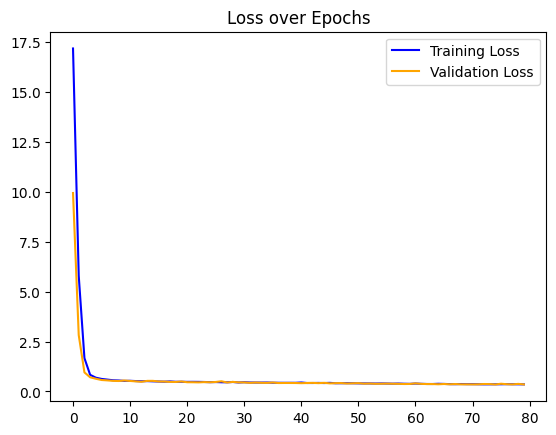

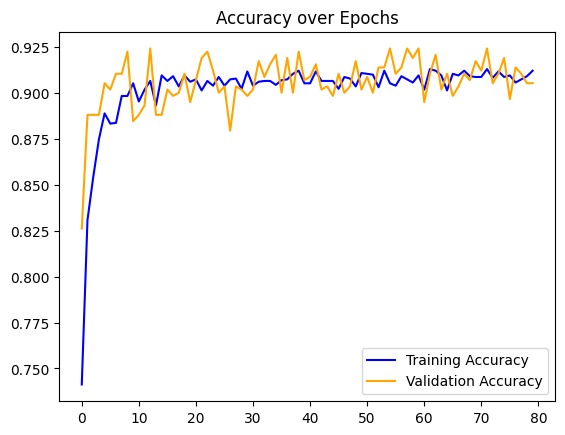

In [36]:
# Plot the training history
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.legend()
plt.title("Loss over Epochs")
plt.show()

# Plot accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

In [37]:
# Evaluate the model
model.evaluate(X_test, y_test)

# Predict
y_pred = model.predict(X_test)

# Convert the predictions to binary
y_pred = np.where(y_pred > 0.5, 1, 0)

# Print the classification report
from sklearn.metrics import classification_report
nn_report = classification_report(y_test, y_pred)
print(nn_report)

23/23 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       309
           1       0.89      0.98      0.93       417

    accuracy                           0.91       726
   macro avg       0.93      0.90      0.91       726
weighted avg       0.92      0.91      0.91       726



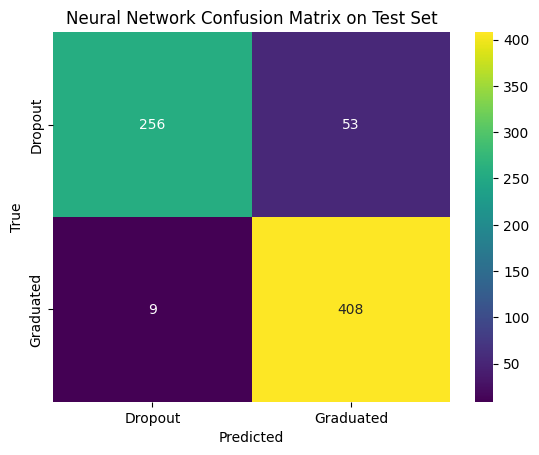

In [38]:
# Make a confusion matrix
from sklearn.metrics import confusion_matrix
nn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='viridis')

# Convert the target back to the original classes
plt.xticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.yticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Neural Network Confusion Matrix on Test Set')
plt.show()

## SVM

In [40]:
# Create svm
from sklearn.svm import SVC
from tqdm import tqdm

# Hyperparameters
c_vals = [0.1, 1, 10, 100]
kernel = ['linear', 'rbf', 'poly']
errors = []
best_params = None
best_error = np.inf

# Grid search to find best params
# SVMs are so fast that we can afford to do a grid search
for k in tqdm(kernel):
    for c in c_vals:
        svc = SVC(C=c, kernel=k)
        svc.fit(X_train, y_train)
        error = np.mean((y_val - svc.predict(X_val))**2)
        errors.append(error)
        if error < best_error:
            best_error = error
            best_params = (c, k)

# Print best params
print(f"Best params: {best_params}")


100%|██████████| 3/3 [00:18<00:00,  6.11s/it]

Best params: (1, 'rbf')


In [41]:
# Create the model using best params
svc = SVC(C=best_params[0], kernel=best_params[1])

# Fit the model
svc.fit(X_train, y_train)

# Predict
y_pred = svc.predict(X_test)

# Print the classification report
svm_report = classification_report(y_test, y_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       309
           1       0.89      0.98      0.93       417

    accuracy                           0.92       726
   macro avg       0.93      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726



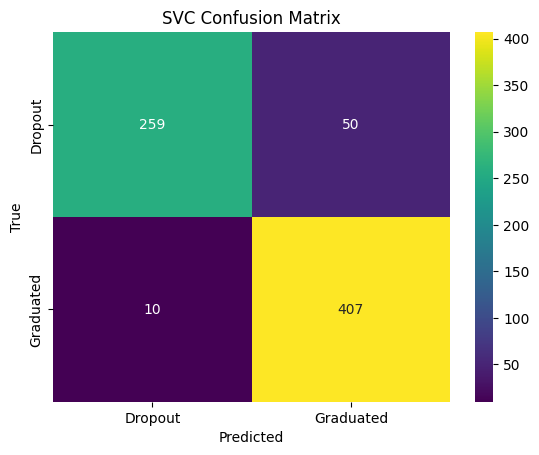

In [42]:
# Make a confusion matrix
from sklearn.metrics import confusion_matrix
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='viridis')

# Convert the target back to the original classes
plt.xticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.yticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVC Confusion Matrix')
plt.show()

## Comparison

In [43]:
print("NEURAL NETWORK\n", nn_report, "\n")
print("SVM\n", svm_report, "\n")

NEURAL NETWORK
               precision    recall  f1-score   support

           0       0.97      0.83      0.89       309
           1       0.89      0.98      0.93       417

    accuracy                           0.91       726
   macro avg       0.93      0.90      0.91       726
weighted avg       0.92      0.91      0.91       726
 

SVM
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       309
           1       0.89      0.98      0.93       417

    accuracy                           0.92       726
   macro avg       0.93      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726
 



The models both finish with >91% accuracy, which is quite good; SVM slightly out edged the neural network at 92% accuracy. The deep learning model has better precision, while the SVM has better recall. These differences are comparable, resulting in the same F1 score for both models. It is extremely difficult to say which model is better, as they are both quite good.

# Regression

In [101]:
# Reread the data
df = pd.read_csv("../data/academic-success.csv", sep=";")

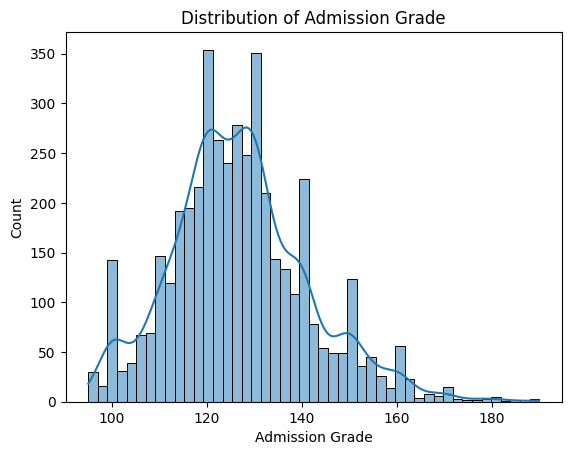

In [47]:
# Plot grade distribution
sns.histplot(df["Admission grade"], kde=True)
plt.title("Distribution of Admission Grade")
plt.xlabel("Admission Grade")
plt.ylabel("Count")
plt.show()

Very normal distribution of the target variable.

In [102]:
# Normalize the data

# Normalize the data
numeric_features = [
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Previous qualification (grade)",
    "Admission grade",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

# Get admission grade mean and std so we can unnorm later
admission_grade_mean = df["Admission grade"].mean()
admission_grade_std = df["Admission grade"].std()

# Normalize numeric features
df[numeric_features] = (df[numeric_features] - df[numeric_features].mean()) / df[numeric_features].std()

# One hot encode categorical features
category_features = df.columns.difference(numeric_features)

# Convert Target to Numeric
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"])

# Expand the categorical features
df = pd.get_dummies(df, columns=category_features)

# Get all the new names
category_features = df.columns.difference(numeric_features)


for category in category_features:
    df[category] = to_categorical(df[category])

df.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Previous qualification_40,Previous qualification_42,Previous qualification_43,Scholarship holder_0,Scholarship holder_1,Target_0,Target_1,Target_2,Tuition fees up to date_0,Tuition fees up to date_1
0,-0.804750,0.022226,-0.430314,-0.300779,-2.528274,-1.985844,-1.521085,-2.196854,-0.199251,-0.28241,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,2.076585,1.071805,-0.562104,-0.300779,-0.109093,-0.550130,0.418003,0.693520,-0.199251,-0.28241,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,-0.804750,-0.150402,-0.562104,-0.300779,-0.109093,-1.985844,-1.521085,-2.196854,-0.199251,-0.28241,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,-0.804750,-0.509468,-0.430314,-0.300779,-0.109093,-0.071559,0.418003,0.575546,-0.199251,-0.28241,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,-2.472892,1.002754,2.864442,-0.300779,-0.109093,0.167727,0.094821,0.349428,-0.199251,-0.28241,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [103]:
from sklearn.model_selection import train_test_split

# Target is Admission grade
X = df.drop(columns=["Admission grade"])
y = df["Admission grade"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Build validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Print the shapes
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(2831, 264) (2831,)
(708, 264) (708,)
(885, 264) (885,)


In [63]:
# Function that builds model given hyperparameters
def build_regression_model(hidden_layers=1, neurons=30, lr=0.01, regularization="l2", reg_rate=0.001, activation="relu", optimizer="adam", input_shape=(X_train.shape[1],)):
    # Create model
    model = Sequential()

    # Build model based on regularizer
    if regularization == "l1":
        model.add(Dense(neurons, activation=activation, input_shape=input_shape, kernel_regularizer=kr.regularizers.l1(reg_rate)))

        # Add hidden layers
        for _ in range(hidden_layers):
            model.add(Dense(neurons, activation=activation, kernel_regularizer=kr.regularizers.l1(reg_rate)))

    # L2 Regularization
    elif regularization == "l2":
        model.add(Dense(neurons, activation=activation, input_shape=input_shape, kernel_regularizer=kr.regularizers.l2(reg_rate)))
        for _ in range(hidden_layers):
            model.add(Dense(neurons, activation=activation, kernel_regularizer=kr.regularizers.l2(reg_rate)))

    # Dropout
    elif regularization == "dropout":
        model.add(Dense(neurons, activation=activation, input_shape=input_shape))
        model.add(kr.layers.Dropout(reg_rate))
        for _ in range(hidden_layers):
            model.add(Dense(neurons, activation=activation))
            model.add(kr.layers.Dropout(reg_rate))

    # No regularization
    else:
        model.add(Dense(neurons, activation=activation, input_shape=input_shape))
        for _ in range(hidden_layers):
            model.add(Dense(neurons, activation=activation))

    # Add linear output layer
    model.add(Dense(1, activation="linear"))

    # Compile model
    if optimizer == "adam":
        model.compile(loss="mse", optimizer=kr.optimizers.Adam(learning_rate=lr), metrics=["mse"])
    elif optimizer == "sgd":
        model.compile(loss="mse", optimizer=kr.optimizers.SGD(learning_rate=lr), metrics=["mse"])
    elif optimizer == "rmsprop":
        model.compile(loss="mse", optimizer=kr.optimizers.RMSprop(learning_rate=lr), metrics=["mse"])

    # Default to Adam
    else:
        model.compile(loss="mse", optimizer=kr.optimizers.Adam(learning_rate=lr), metrics=["mse"])

    # Return Compiled Model
    return model

# Test with default hyperparameters
model = build_regression_model()
model.summary()

Model: "sequential_1318"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6557 (Dense)          (None, 30)                7950      
                                                                 
 dense_6558 (Dense)          (None, 30)                930       
                                                                 
 dense_6559 (Dense)          (None, 1)                 31        
                                                                 
Total params: 8911 (34.81 KB)
Trainable params: 8911 (34.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
89/89 [==============================] - 1s 4ms/step - loss: 1.0986 - mse: 1.0370 - val_loss: 0.9542 - val_mse: 0.9027
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.7657 - mse: 0.7200 - val_loss: 0.6102 - val_mse: 0.5704
Epoch 3/100
89/89 [

In [64]:
import itertools
from tqdm import tqdm
from keras.callbacks import EarlyStopping

# Create Lists of hyperparameters to test
hidden_layers = [2, 3, 4]
neurons = [16, 32, 64]
lrs = [0.001, 0.01, 0.1]
regularizations = ["l1", "l2", "dropout"]
reg_rates = [0.001, 0.01]
activations = ["relu", "sigmoid"]
optimizers = ["adam", "rmsprop"]
batch_sizes = [32, 64]

# Create a list of all hyperparameters
hyperparameters = list(itertools.product(hidden_layers, neurons, lrs, regularizations, reg_rates, activations, optimizers, batch_sizes))

# Store the results
results = []

# Loop through all hyperparameters
for hidden_layer, neuron, lr, regularization, reg_rate, activation, optimizer, batch_size in tqdm(hyperparameters):
    # Build the model
    model = build_regression_model(hidden_layer, neuron, lr, regularization, reg_rate, activation, optimizer)

    # Add early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # Fit the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=early_stopping, epochs=100, batch_size=batch_size, verbose=False)

    # Get the final accuracy
    results.append({
        "hidden_layers": hidden_layer,
        "neurons": neuron,
        "lr": lr,
        "regularization": regularization,
        "reg_rate": reg_rate,
        "activation": activation,
        "optimizer": optimizer,
        "batch_size": batch_size,
        "train_loss": history.history['loss'][-1],
        "val_loss": history.history['val_loss'][-1],
        "mse": history.history['mse'][-1],
        "val_mse": history.history['val_mse'][-1],
    })

100%|██████████| 1296/1296 [1:50:48<00:00,  5.13s/it]


In [66]:
# Make results into a dataframe
results_df = pd.DataFrame(results)

# Sort by validation accuracy
results_df = results_df.sort_values("val_loss", ascending=True)

# Print the top 10 results
results_df.head(10)

,hidden_layers,neurons,lr,regularization,reg_rate,activation,optimizer,batch_size,train_loss,val_loss,mse,val_mse
764,3,64,0.001,dropout,0.010,sigmoid,adam,32,0.456391,0.476595,0.456391,0.476595
180,2,32,0.001,dropout,0.001,sigmoid,adam,32,0.431263,0.477497,0.431263,0.477497
37,2,16,0.001,dropout,0.001,sigmoid,adam,64,0.430712,0.478160,0.430712,0.478160
612,3,32,0.001,dropout,0.001,sigmoid,adam,32,0.434397,0.480340,0.434397,0.480340
613,3,32,0.001,dropout,0.001,sigmoid,adam,64,0.449282,0.480652,0.449282,0.480652
908,4,16,0.001,dropout,0.010,sigmoid,adam,32,0.457996,0.480835,0.457996,0.480835
181,2,32,0.001,dropout,0.001,sigmoid,adam,64,0.474455,0.481297,0.474455,0.481297
620,3,32,0.001,dropout,0.010,sigmoid,adam,32,0.477966,0.482463,0.477966,0.482463
477,3,16,0.001,dropout,0.010,sigmoid,adam,64,0.462558,0.484994,0.462558,0.484994
46,2,16,0.001,dropout,0.010,sigmoid,rmsprop,32,0.496127,0.486512,0.496127,0.486512


The best hyperparameters were:



*   Hidden Layers: 3
*   Layer Size: 64
*   Learning Rate: 0.001
*   Regularization: Dropout
*   Regularization Strength: 0.01
*   Activation: Sigmoid
*   Optimizer: Adam
*   Batch Size: 32

In [67]:
# Get the best model
best_model = results_df.iloc[0]

# Build the model
model = build_regression_model(best_model["hidden_layers"], best_model["neurons"], best_model["lr"], best_model["regularization"], best_model["reg_rate"], best_model["activation"], best_model["optimizer"])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=early_stopping, epochs=100, batch_size=32, verbose=True)

Epoch 1/100
89/89 [==============================] - 1s 5ms/step - loss: 0.9855 - mse: 0.9855 - val_loss: 1.0069 - val_mse: 1.0069
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 0.9610 - mse: 0.9610 - val_loss: 0.9806 - val_mse: 0.9806
Epoch 3/100
89/89 [==============================] - 0s 3ms/step - loss: 0.8245 - mse: 0.8245 - val_loss: 0.6849 - val_mse: 0.6849
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 0.6420 - mse: 0.6420 - val_loss: 0.5954 - val_mse: 0.5954
Epoch 5/100
89/89 [==============================] - 0s 3ms/step - loss: 0.6077 - mse: 0.6077 - val_loss: 0.5696 - val_mse: 0.5696
Epoch 6/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.5637 - val_mse: 0.5637
Epoch 7/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5930 - mse: 0.5930 - val_loss: 0.5578 - val_mse: 0.5578
Epoch 8/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5924 - m

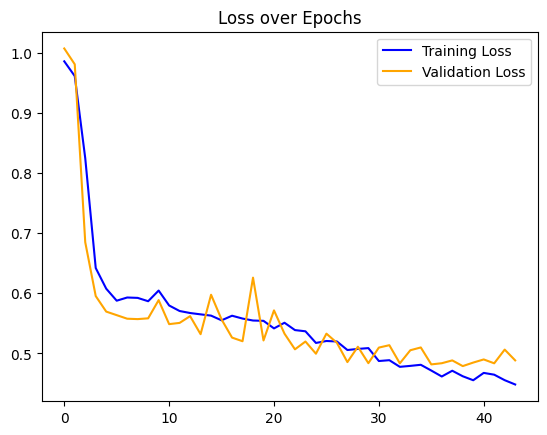

In [69]:
# Plot the training history
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.legend()
plt.title("Loss over Epochs")
plt.show()

89/89 [==============================] - 0s 1ms/step
Train Mean Squared Error: 0.43856666842415576


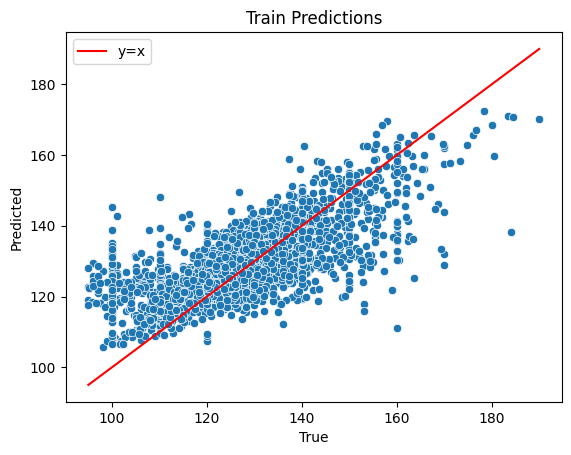

In [70]:
# Show Train vs Train Predictions
y_pred_train = model.predict(X_train)
mse = np.mean((y_train - y_pred_train.flatten())**2)
print(f"Train Mean Squared Error: {mse}")


# Unnormalize the data
y_pred_train = y_pred_train * admission_grade_std + admission_grade_mean
y_train = y_train * admission_grade_std + admission_grade_mean

# Plot the predictions
sns.scatterplot(x=y_train, y=y_pred_train.flatten())
x = np.linspace(np.min(y_train), np.max(y_train), 100)
plt.plot(x, x, '-r', label='y=x')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Train Predictions")
plt.legend(loc='best')
plt.show()

28/28 [==============================] - 0s 1ms/step
Test Mean Squared Error: 0.6100019671652736


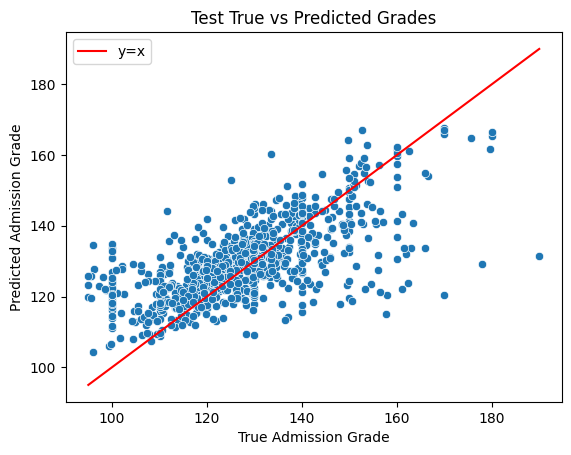

In [71]:
# Predict
y_pred = model.predict(X_test)

mse = np.mean((y_test - y_pred.flatten())**2)
print(f"Test Mean Squared Error: {mse}")

# Unnormalize the data
y_pred = y_pred * admission_grade_std + admission_grade_mean
y_test = y_test * admission_grade_std + admission_grade_mean

# Plot the predictions
sns.scatterplot(x=y_test, y=y_pred.flatten())

# Add a line
x = np.linspace(np.min(y_test), np.max(y_test), 100)
plt.plot(x, x, '-r', label='y=x')

# Unnormalize the data
plt.xlabel('True Admission Grade')
plt.ylabel('Predicted Admission Grade')
plt.title('Test True vs Predicted Grades')
plt.legend(loc='upper left')
plt.show()

The model does pretty well on the test set. We can see a decent fit despite heavy noise.

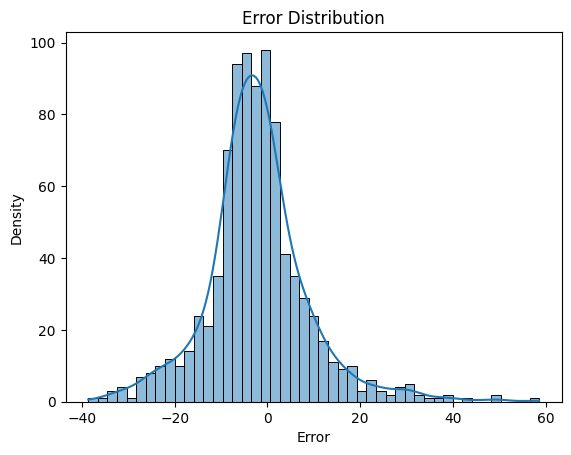

In [72]:
# Visualize the error
sns.histplot(y_test - y_pred.flatten(), kde=True)
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Error Distribution')
plt.show()

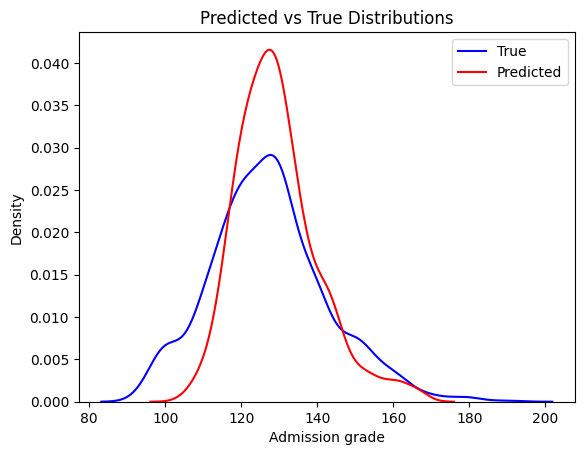

In [73]:
# Plot predictions distribution vs true
sns.kdeplot(y_test, label='True', color='blue')
sns.kdeplot(y_pred.flatten(), label='Predicted', color='red')
plt.xlabel('Admission grade')
plt.ylabel('Density')
plt.title('Predicted vs True Distributions')
plt.legend()
plt.show()

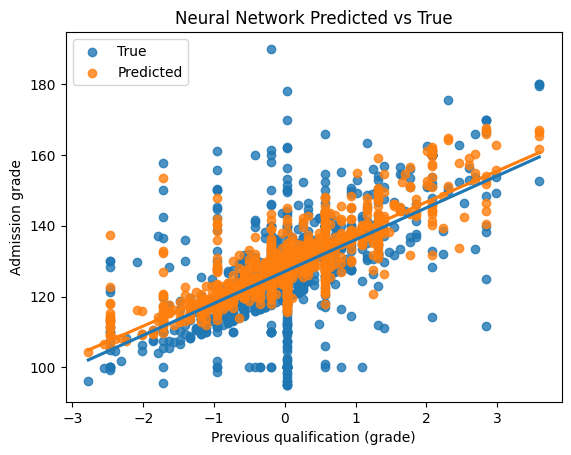

In [75]:
# Plot predicted vs true on a scatter plot
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_test, label='True', ci=None)
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_pred.flatten(), label='Predicted', ci=None)
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')
plt.title('Neural Network Predicted vs True')
plt.legend()
plt.show()

There is much less noise in the predictions, as we might expect. but the model seems to miss the central trend.

## SVM

In [104]:
# Create svm
from sklearn.svm import SVR
from tqdm import tqdm

# Renormalize the y values
y_train = (y_train - admission_grade_mean) / admission_grade_std
y_test = (y_test - admission_grade_mean) / admission_grade_std

# Hyperparameters
c_vals = [0.1, 1, 5, 10]
epsilons = [0.1, 0.01, 0.001, 0.0001]
kernel = ['linear', 'rbf', 'poly']
errors = []
best_params = None
best_error = np.inf

# Wrap parameters together
params = list(itertools.product(c_vals, epsilons, kernel))

# Grid search to find best params
# SVMs are so fast that we can afford to do a grid search
for c, epsilon, k in tqdm(params):
  svr = SVR(C=c, epsilon=epsilon, kernel=k)
  svr.fit(X_train, y_train)
  error = np.mean((y_val - svr.predict(X_val))**2)
  errors.append(error)
  if error < best_error:
      best_error = error
      best_params = (c, epsilon, k)

# Print best params
print(f"\nBest params: {best_params}")


100%|██████████| 48/48 [09:20<00:00, 11.69s/it]


Best params: (0.1, 0.1, 'poly')


In [105]:
# Create the model
svr = SVR(C=best_params[0], epsilon=best_params[1], kernel=best_params[2])

# Fit the model
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

# Calculate the mean squared error
mse = np.mean((y_test - y_pred)**2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5901800396856673


Test Mean Squared Error: 0.5901800396856673


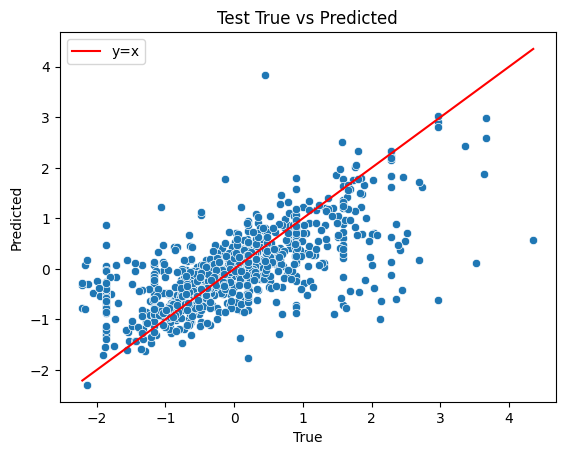

In [106]:
# Predict

mse = np.mean((y_test - y_pred.flatten())**2)
print(f"Test Mean Squared Error: {mse}")

# Plot the predictions
sns.scatterplot(x=y_test, y=y_pred.flatten())

# Add a line
x = np.linspace(np.min(y_test), np.max(y_test), 100)
plt.plot(x, x, '-r', label='y=x')

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Test True vs Predicted')
plt.legend(loc='upper left')
plt.show()

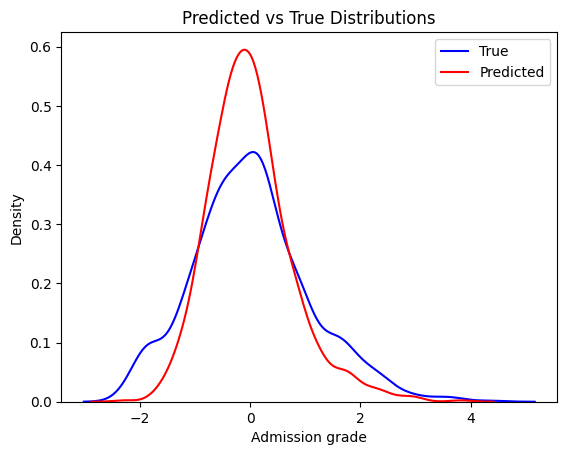

In [107]:
# Plot predictions distribution vs true
sns.kdeplot(y_test, label='True', color='blue')
sns.kdeplot(y_pred.flatten(), label='Predicted', color='red')
plt.xlabel('Admission grade')
plt.ylabel('Density')
plt.title('Predicted vs True Distributions')
plt.legend()
plt.show()

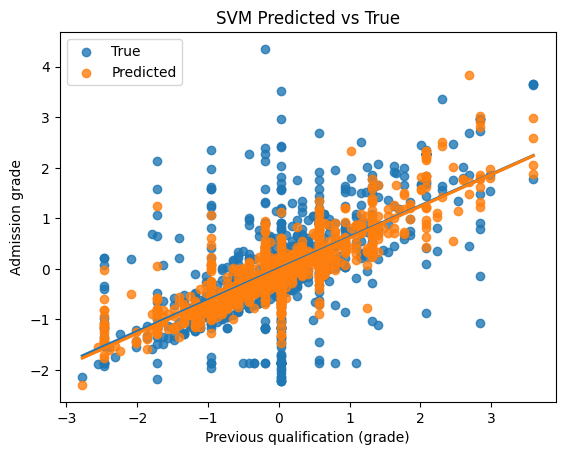

In [109]:
# Plot predicted vs true on a scatter plot
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_test, label='True', ci=None)
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_pred.flatten(), label='Predicted', ci=None)
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')
plt.title('SVM Predicted vs True')
plt.legend()
plt.show()

## Comparison

This actually  outperforms the deep learning model. We see a  better fit t the data and a lower MSE (0.68 vs 0.57), demonstrating the power of SVMs for this type of data. However, due to the nature of deep learning, it is likely with more extensive tuning, the deep learning model could outperform the SVM as Neural Networks are known to be universal function approximators.